# Final Project Methods Draft

needs:
-journal article on TSS seasonality (multiple if applicable)
-more methods explanation
-results & analysis section
-discussion
-conclusion
-clean whole script!!!!!!

#### Research Question: 
Do TSS concentrations from the Ipswich River show strong seasonality that corresponds to the dominant precipitation regime and corresponding discharge response?

### Research question will be addressed through the following analysis and visualizations:

analysis: 
-mean, min, max of: TSS concentrations, discharge, precip
-seasonal mean, min, max for TSS, discharge, precip
-centroid and normalized time of occurrance for: TSS, discharge, precip (seasonality)
-seasonal peaks (per season)

visualizations:
-TSS concentrations, Discharge, precipitation over entire period of record (2 plots)
-average monthly TSS concentrations over all months of the year (1 plot)
-average seasonal means (1 plot: bar graph)
-polar plots depicting TSS, precip, and discharge as continuous circular data (1 plot, 3 subplots).


### Site Description: (MORE TO GO HERE!)
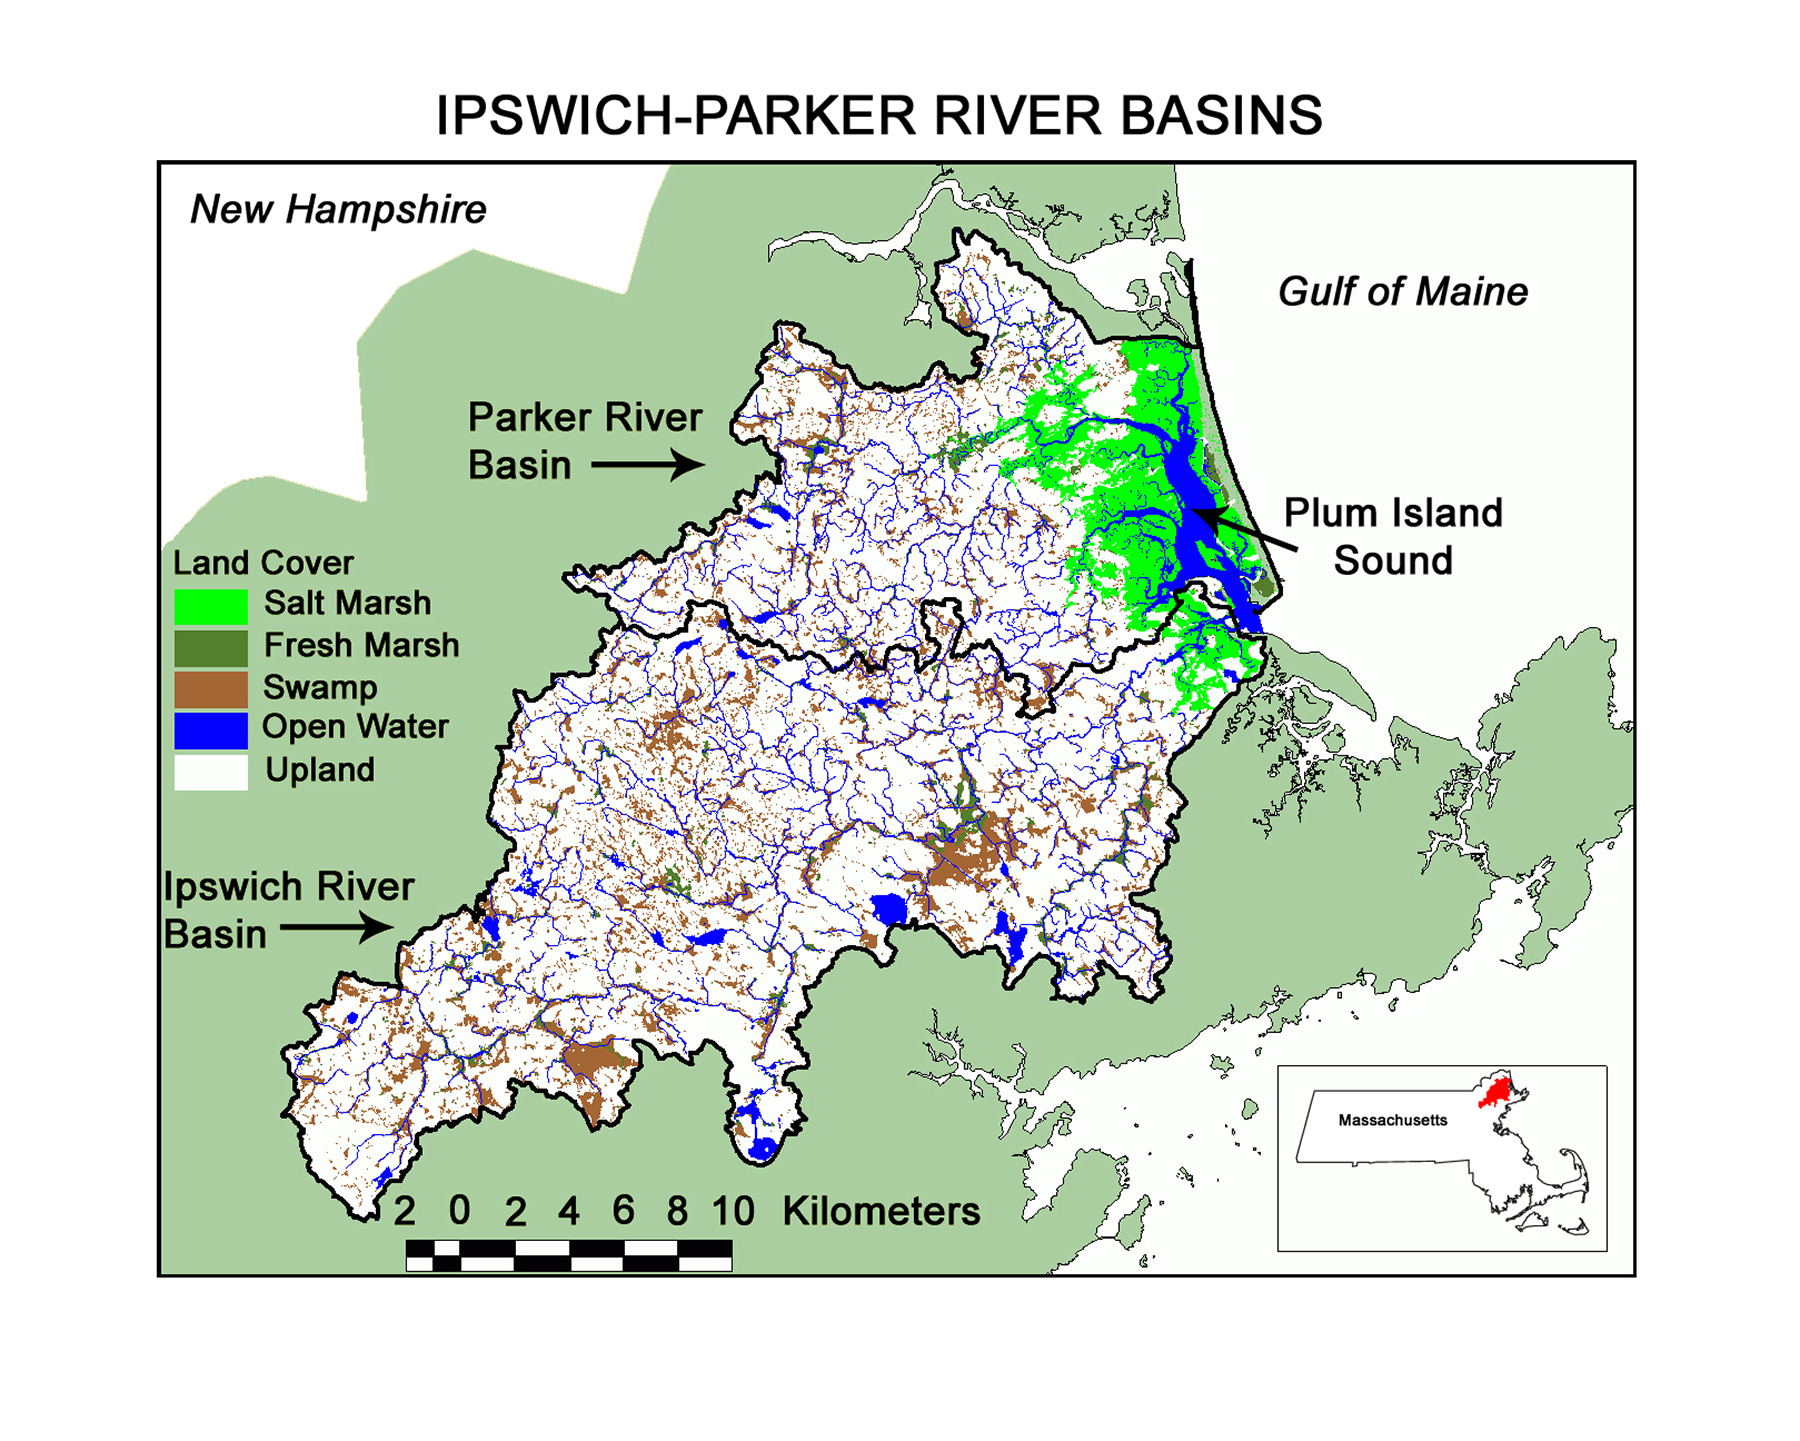
 <b>Figure 1. </b>Map of Plum Island Ecosystem LTER watersheds. The Parker River is the northern watershed. The Ipswich River is the southern watershed. This project focuses on one collection site in the Ipswich River watershed, specifically at the Ipswich Dam in the town of Ipswich, MA.

### Data Description:

Discharge data came from USGS gauge 01102000 (Ipswich River near Ipswich, MA; drainage area=125 sq.miles). This gauge supplied daily data from January 1, 1999 to December 31, 2017, which was reported in average daily cubic feet per second. 

Precipitation data came from precipitation gauge WBAN:54733 at the Beverly Municipal Airport in Beverly, MA (42.58417°, -70.9175°). This dataset is provided by the NOAA Local Climatological Database. This dataset has hourly frequency intervals, and has a period of record from January 1, 1999 to December 31, 2017. The precipitation period of record does not extend past December 5, 1998. The precipitation dataset also provides snow data, which will be utilized in the seasonality analyses.

Utilizing precipitation data will inform the seasonality of the precipitation regime in coastal New England. Discharge data will show the stream response to the precipitation. 

The Total Suspended Solids (TSS) data came from Water Systems Analysis Group (WSAG) of the University of New Hampshire. This dataset was processed and cleaned by Christopher Whitney (PhD candidate, WSAG 2021). 1993-2020 is period of record for the entire dataset. For this project analysis, the data has been trimmed to January 1, 1999 to December 31, 2017. The data from January 1 2018- December 31 2010 is repeated data that was projected from the last processed collection in December 2017.
TSS data was collected via in-situ autosamples on a monthly or bi-monthly schedule. 

January 1, 1999 to December 31, 2017 was the chosen representative timeframe because it is when all three datasets have the most overlapping recorded data, and the time with the fewest repeated data. While a 20 year record is more ideal, not enough precipitation data existed, and would therefore skew annual averages.

Locations of gauges and collections sites are in Figure 2.

#### Data organization
 <b>Table 1. </b> Table of data utilized in ESCI Final Project. Data are organized by datatype, filename and type, and author, group, or agency that processed data.
 
| Data Type | Filename/type | Author, Group, Agency |
| --- | --- | --- |
| TSS concentrations | 'continuous_TSS_ID.csv' | Christopher Whitney, WSAG |
| Daily Discharge | 'discharge_Ipswich.txt' | USGS |
| Daily Precipitation | 'beverly_airport.csv | NOAA |





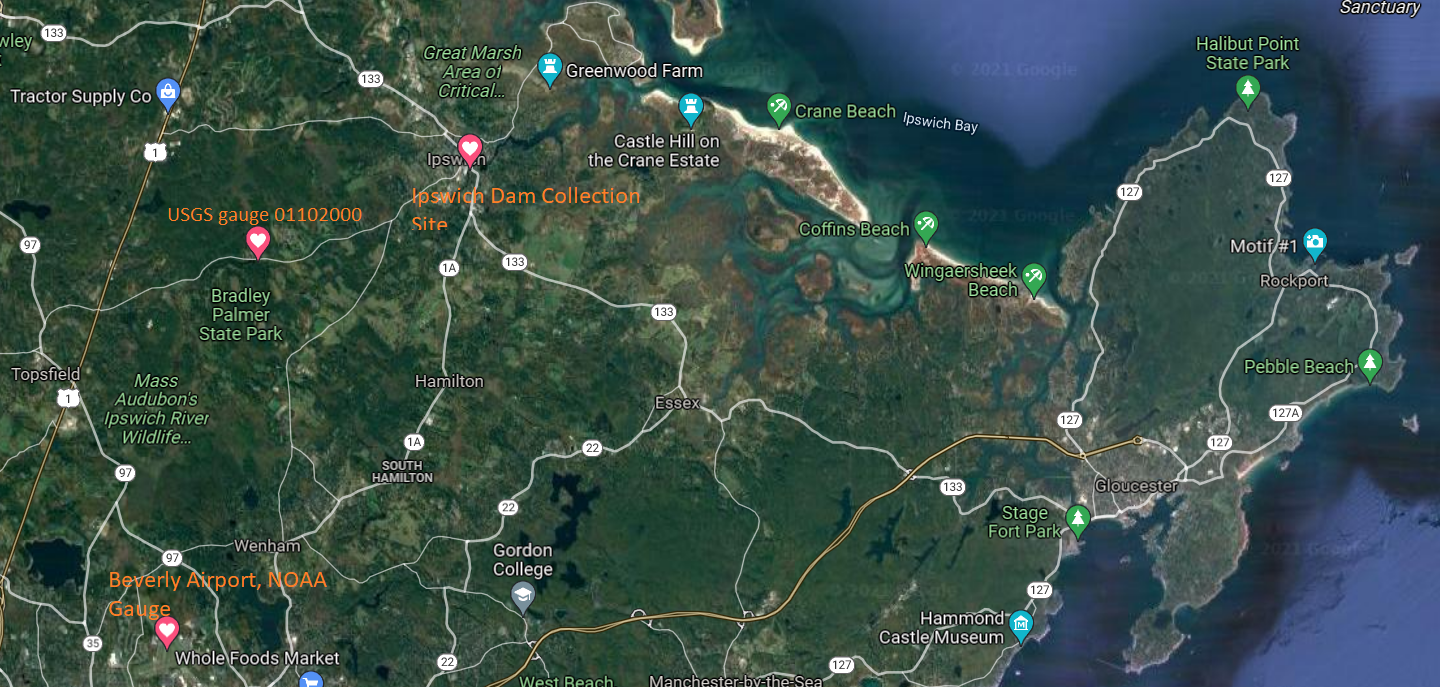
 <b>Figure 2. </b> Map showing NOAA Gauge WBAN:54733 at Beverly Airport in Beverly, MA, USGS gauge 01102000 on the Ipswich River above Ipswich, MA, and the collection site at Ipswich Dam, in Ipswich, MA.

In [23]:
#%%import libraries
import numpy as np                   # functions for data analysis 
import pandas as pd                # functions for data frames
from matplotlib import pyplot as plt
import datetime as datetime
import matplotlib.ticker as mticker
from matplotlib import dates

Data were identified and cleaned to reflect the water years from the period of record (WY 2006-2020), and TSS data from an autosampler at the Ipswich Dam on the Ipswich River, Ipswich, MA. Precipitation data comes from the Beverly Airport preciptiation gauge in Beverly, MA.

In [24]:
#specify inputs
#specify inputs
filenames=['discharge_Ipswich.txt',  'continuous_TSS_ID.csv', 'beverly_airport.csv']
drainArea=125*1.60934/1000 #sq. m
startyear=datetime.datetime(1999, 1,1)
endyear=datetime.datetime(2017,12,31)
title='Precipitation and Discharge,Ipswich Dam, Ipswich, MA; 1999-2017'

In [25]:
#load TSS dataframe 
dftss=pd.read_csv(filenames[1], delimiter=',',comment='#', header=0, parse_dates=['day'], na_values=[-9999, 'NaN'])
dftss.fillna(0) 
dftss=dftss.set_index('day')
dftss=dftss.rename(columns={'conc':'tss_mgL'})
dftss=dftss[['tss_mgL']]
dftss=dftss[startyear:endyear]
dftss

tss_mgL
day                
1999-01-01      1.5
1999-01-02      1.5
1999-01-03      1.5
1999-01-04      1.5
1999-01-05      1.5
...             ...
2017-12-27      2.7
2017-12-28      2.7
2017-12-29      2.7
2017-12-30      2.7
2017-12-31      2.7

[6940 rows x 1 columns]

In [26]:
#discharge dataframe 
dfq=pd.read_csv(filenames[0], delimiter='\t', comment='#', header=1, parse_dates=['20d'], na_values=[-9999, 'NaN'])
dfq.fillna(method='ffill', inplace = True)
dfq=dfq.rename(columns={'20d':'date', '14n': 'discharge'})
dfq=dfq.set_index('date')
dfq=dfq[['discharge']]
dfq=dfq[startyear:endyear]
dfq

discharge
date                 
1999-01-01       56.0
1999-01-02       46.0
1999-01-03       54.0
1999-01-04       95.0
1999-01-05      110.0
...               ...
2017-12-27       47.0
2017-12-28       44.9
2017-12-29       43.0
2017-12-30       40.2
2017-12-31       36.9

[6940 rows x 1 columns]

In [27]:
# precip dataframe #original precip in inches/standard
# original precip in standard units
dfp=pd.read_csv(filenames[2], delimiter=',', comment='#', header=0, parse_dates=['DATE'], na_values=[-9999, 'NaN'])
dfp.fillna(method='ffill', inplace = True) 
dfp=dfp.rename(columns={'DATE':'date', 'PRCP': 'precip'})
dfp=dfp.set_index('date')
dfp=dfp[['precip' ]]
dfp=dfp[startyear:endyear]
dfp

precip
date              
1999-01-01     0.0
1999-01-02     0.0
1999-01-03     0.0
1999-01-04     0.0
1999-01-05     0.0
...            ...
2017-12-27     0.0
2017-12-28     0.0
2017-12-29     0.0
2017-12-30     0.0
2017-12-31     0.0

[6933 rows x 1 columns]

In [28]:
#conversions and calculations

# #convert  discharge from cfs to cubic Liters/second (data reported as daily average)
dfq['discharge']=dfq['discharge']*28.3168 

 #convert precip from inches/day to cm/day
dfp['precip']=dfp['precip']* 2.54

#identify concentration max & min and associated date
max_conc=dftss['tss_mgL'].max()
min_conc=dftss['tss_mgL'].min()
mean_conc=dftss['tss_mgL'].mean()
print('the maximum tss concentration is ' + str(max_conc) +'mg/L')
print('the minimum tss concentration is ' + str(min_conc) +'mg/L')
print('the average tss concentration is ' + str(mean_conc) +'mg/L')



the maximum tss concentration is 13.8mg/L
the minimum tss concentration is 0.1mg/L
the average tss concentration is 2.0586887608069193mg/L


### Plot 1: 
A time series plot was created to reflect the precipitation, and discharge throughout the entire period of record.


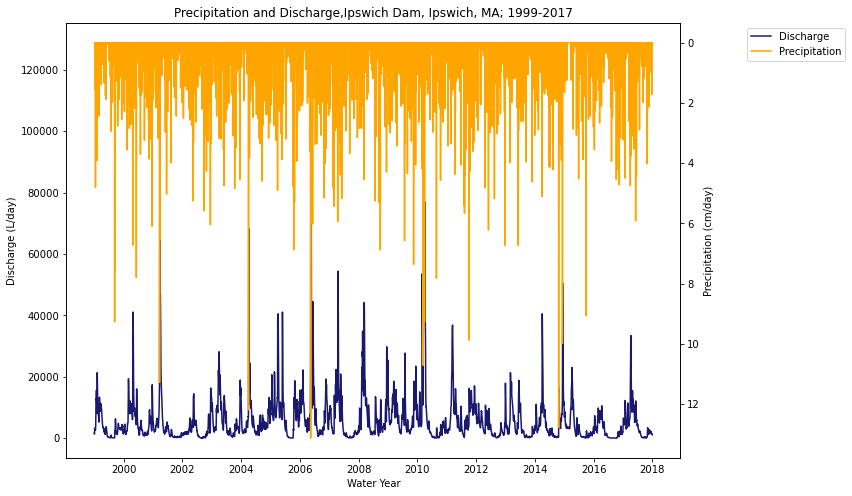

In [29]:
#This cell has a timeseries function that produces:
#1 create timeseries plot of all data over entire period of record: precip and discharge

#create timeseries plot of all data over entire period of record

fig, (ax)= plt.subplots(1,1, sharex=True)
fig.set_size_inches(11,8)
#load data
line1=ax.plot(dfq['discharge'],  color='midnightblue', linestyle='-', label='Discharge')
ax2 = ax.twinx()
line2=ax2.plot(dfp['precip'], color='orange', linestyle='-', label='Precipitation')
#set titles and axis
ax2.invert_yaxis()
ax.set_ylabel('Discharge (L/day)')
ax2.set_ylabel('Precipitation (cm/day)') #this will change!!!
ax.set_xlabel('Water Year')
ax.set_title(title)
lines=line1+line2
labs=[l.get_label() for l in lines]
ax.legend(lines, labs,bbox_to_anchor=(1.1,1), loc='upper left')

In order to determine seasonality, two separate methods were used. 
<br>1) Seasons were assigned to every day of the year, in order to sort all winter days into 'winter,' spring days into 'spring,' and so on. These seasons were determined by the spring and fall equinoxes, and the winter and summer solstices; seasons began one day after the equinox and ended on the solstice, or vice versa, depending on the season. Seasons were used to create a new dataframe that included seasonal averages of TSS concentrations. (BAR GRAPH!) 

<br>2) All data points were appointed a day of the year (January 1=Day 1, January 2=Day 2, etc.), and a month of year (January= Month 1, February = Month 2). Centroid dates and normalized times of occurance were calculated using the day of year; these dates indicate when (WHAT DO THEY INDICATE!). (CALCULATIONS!)

Average monthly data was visually represented in a discharge-TSS rating curve. Seasonality was visualized through circular data represented by polar plots. (METHODS!)

PLOTTED DISCHARGE AGAINST tss!!!!!!!! TALK ABOUT IT!

In [36]:
#assign seasons to every day in dataframe
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
dftss['season'] = dftss.index.map(season_of_date)
dfq['season'] = dfq.index.map(season_of_date)
dfp['season'] = dfp.index.map(season_of_date)

In [31]:
#%% create annual dataframes for all data
#annual data used to plot TSS against discharge in plot2
#annual dataframes will be used in radians & centroid calculation

def annualdata(df):
    annual=df.groupby(df.index.year).sum()
    annual=annual.to_frame()
    annualmean=annual.mean()
    return(annual, annualmean)
dftss_annual, annualmeantss=annualdata(dftss['tss_mgL'])
dfq_annual, annualmeanq=annualdata(dfq['discharge'])
dfp_annual, annualmeanp=annualdata(dfp['precip'])


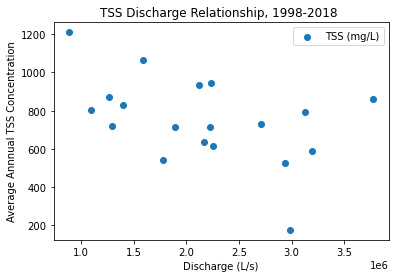

In [32]:
#plot all points from winter, spring, etc. in different colors # NEED TO COLOR CODE ACROSS SEASONALITY
#.loc
fig, (ax)=plt.subplots()
#ax.scatter(y=dftss['tss_mgL'], x=dfq['discharge'])
ax.scatter(y=dftss_annual['tss_mgL'], x=dfq_annual['discharge'], label='TSS (mg/L)')
ax.set_ylabel('Average Annnual TSS Concentration')
ax.set_xlabel('Discharge (L/s)')
ax.set_title('TSS Discharge Relationship, 1998-2018 ')
ax.legend()
plt.show()

In [34]:
#create day of year and month of year in all dataframes
def timeofyear(df): 
    df['dayyear']=df.index.dayofyear
    df['month']=df.index.month
    df['year']=df.index.year
    df_month=df.groupby('month').mean()
    df_szn=df.groupby('season').mean()
    return(df['dayyear'], df['month'], df['year'], df_month, df_szn)

dftss['dayyear'], dftss['month'], dftss['year'], dftss_month, dftss_szn=timeofyear(dftss)
dfq['dayyear'], dfq['month'], dfq['year'], dfq_month, dfq_szn=timeofyear(dfq)
dfp['dayyear'], dfp['month'], dfp['year'], dfp_month, dfp_szn=timeofyear(dfp)

Text(0.5, 1.0, 'Average Seasonal TSS Concentrations, Ipswich Dam, Ipswich')

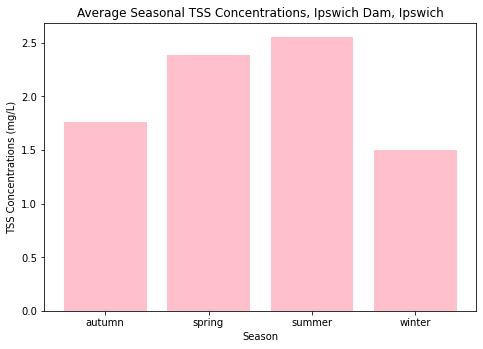

In [39]:
#%% seasonalTSS distribution
#bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar( dftss_szn.index, dftss_szn['tss_mgL'], color='pink', label='TSS Concentration (mg/L)')
ax.set_ylabel('TSS Concentrations (mg/L)')
ax.set_xlabel('Season')
#ax.legend(bbox_to_anchor=(1.1,1), loc='upper left')
ax.set_title('Average Seasonal TSS Concentrations, Ipswich Dam, Ipswich')

In [40]:
#This cell creates the centroid for TSS : THIS WILL GO INTO THE CENTROID FUNCTION EVENTUALLY!!!

#creating centroid
t=dftss_month['tss_mgL']*dftss_month['dayyear']#time
p=dftss_month['tss_mgL'].sum() #
tsum= t.sum()
#creating degree in radians
dftss_month['MDay Radians']= dftss_month['dayyear']*2*np.pi/365.25
dftss_month['sin']=np.sin(dftss_month['MDay Radians']) #sine, equation 1
dftss_month['cos']=np.cos(dftss_month['MDay Radians']) #cosine, equation 2
s= sum(dftss_month['tss_mgL']*dftss_month['sin']) #equation 1 variable
c= sum(dftss_month['tss_mgL']* dftss_month['cos']) #equation 2 varibale
r=np.sqrt((s**2 + c**2)) #resultant vector- equation 3
i= r/p #seasonality index
#groupby
dftss_annual= dftss.groupby(dftss.index.year).sum()
annualmeantss=dftss_annual['tss_mgL'].mean()

#create column for annual mean line
dftss_month[['AnnualMean']]=annualmeantss
#creates new DF for continuous circular data
dftss_month2=dftss_month.append(dftss_month)
#tss centroid
centroid= str(round(tsum/p)) #centroid- Julian Date
centroidday= datetime.datetime.strptime(centroid, "%j").day #strptime converts integer/ numerical value (JD) to date
centroidmonth= datetime.datetime.strptime(centroid, "%j").month
centroidday=str(centroidday)
centroidmonth=str(centroidmonth)
print(" The centroid day is " +centroidmonth +"/"+ centroidday)
#
#containing angle in radians
phi= np.arctan(s/c)+np.pi #equation 4
circdate= str(round(phi*365/(2*np.pi)))  #JD of year 
circday= datetime.datetime.strptime(circdate, "%j").day
circmonth= datetime.datetime.strptime(circdate, "%j").month
circday=str(circday)
circmonth=str(circmonth)
print(" The average normalized seasonal time of TSS occurence is  " +circmonth +"/"+ circday)

 The centroid day is 7/6
 The average normalized seasonal time of TSS occurence is  7/5


In [42]:
#This cell creates the centroid for DISCHARGE : THIS WILL GO INTO THE CENTROID FUNCTION EVENTUALLY!!!

#creating centroid
tQ=dfq_month['discharge']*dfq_month['dayyear']#time
pQ=dfq_month['discharge'].sum() #
tsumQ= tQ.sum()
#creating degree in radians
dfq_month['MDay Radians']= dfq_month['dayyear']*2*np.pi/365.25
dfq_month['sin']=np.sin(dfq_month['MDay Radians']) #sine, equation 1
dfq_month['cos']=np.cos(dfq_month['MDay Radians']) #cosine, equation 2
sQ= sum(dfq_month['discharge']*dfq_month['sin']) #equation 1 variable
cQ= sum(dfq_month['discharge']* dfq_month['cos']) #equation 2 varibale
rQ=np.sqrt((s**2 + c**2)) #resultant vector- equation 3
iQ= rQ/pQ #seasonality index
#groupby
dfq_annual= dfq.groupby(dfq.index.year).sum()
annualmeanQ=dfq_annual['discharge'].mean()
stdQ=dfq_annual['discharge'].std()
CV1_Q=stdQ/annualmeanQ
#create column for annual mean line
dfq_month[['AnnualMean']]=annualmeanQ
#creates new DF for continuous circular data
dfq_month2=dfq_month.append(dfq_month)
#discharge centroid
qcentroid= str(round(tsumQ/pQ)) #centroid- Julian Date
qcentroidday= datetime.datetime.strptime(qcentroid, "%j").day #strptime converts integer/ numerical value (JD) to date
qcentroidmonth= datetime.datetime.strptime(qcentroid, "%j").month
qcentroidday=str(qcentroidday)
qcentroidmonth=str(qcentroidmonth)
print(" The discharge centroid day is " +qcentroidmonth +"/"+ qcentroidday)
#containing angle in radians
qphi= np.arctan(sQ/cQ)+np.pi #equation 4
qcircdate= str(round(qphi*365/(2*np.pi)))  #JD of year 
qcircday= datetime.datetime.strptime(qcircdate, "%j").day
qcircmonth= datetime.datetime.strptime(qcircdate, "%j").month
qcircday=str(qcircday)
qcircmonth=str(qcircmonth)
print(" The average normalized seasonal time of discharge occurence is  " +qcircmonth +"/"+ qcircday)

 The discharge centroid day is 5/28
 The average normalized seasonal time of discharge occurence is  9/18


In [43]:
#This cell creates the centroid for DISCHARGE : THIS WILL GO INTO THE CENTROID FUNCTION EVENTUALLY!!!
#creating centroid
tP=dfp_month['precip']*dfp_month['dayyear']#time
pP=dfp_month['precip'].sum() #
tsumP= tP.sum()
#creating degree in radians
dfp_month['MDay Radians']= dfp_month['dayyear']*2*np.pi/365.25
dfp_month['sin']=np.sin(dfp_month['MDay Radians']) #sine, equation 1
dfp_month['cos']=np.cos(dfp_month['MDay Radians']) #cosine, equation 2
sP= sum(dfp_month['precip']*dfp_month['sin']) #equation 1 variable
cP= sum(dfp_month['precip']* dfp_month['cos']) #equation 2 varibale
rP=np.sqrt((s**2 + c**2)) #resultant vector- equation 3
iP= rP/pP #seasonality index
#groupby
dfp_annual= dfp.groupby(dfp.index.year).sum()
annualmeanP=dfp_annual['precip'].mean()
stdP=dfp_annual['precip'].std()
CV1_P=stdP/annualmeanP
#create column for annual mean line
dfp_month[['AnnualMean']]=annualmeanP
#creates new DF for continuous circular data
dfp_month2=dfp_month.append(dfp_month)
#precip centroid

pcentroid= str(round(tsumP/pP)) #centroid- Julian Date
pcentroidday= datetime.datetime.strptime(pcentroid, "%j").day #strptime converts integer/ numerical value (JD) to date
pcentroidmonth= datetime.datetime.strptime(pcentroid, "%j").month
pcentroidday=str(pcentroidday)
pcentroidmonth=str(pcentroidmonth)
print(" The precip centroid day is " +pcentroidmonth +"/"+ pcentroidday)
#

#containing angle in radians
pphi= np.arctan(sP/cP)+np.pi #equation 4
pcircdate= str(round(pphi*365/(2*np.pi)))  #JD of year 
pcircday= datetime.datetime.strptime(pcircdate, "%j").day
pcircmonth= datetime.datetime.strptime(pcircdate, "%j").month
pcircday=str(pcircday)
pcircmonth=str(pcircmonth)
print(" The average normalized seasonal time of precip occurence is  " +pcircmonth +"/"+ pcircday)

 The precip centroid day is 7/7
 The average normalized seasonal time of precip occurence is  7/3


In [44]:
#create a function that makes:dates into radians, centroid date, and normalized date of occurance
##this function doesn't work in the polar plot cell because of MDAY Radians length!!! MUST BE FIXED!!!
def centroid (daily):
    daily_month= daily.groupby(daily.index.month).mean()
    dayyear=daily.index.dayofyear
    t=daily*dayyear #time
    p=daily.sum() #
    tsum= t.sum()
    #creating degree in radians
    MDay_radians= dayyear*2*np.pi/365.25
    sin=np.sin(MDay_radians) #sine, equation 1
    cos=np.cos(MDay_radians) #cosine, equation 2
    s= sum(daily*sin) #equation 1 variable
    c= sum(daily* cos) #equation 2 varibale
    r=np.sqrt((s**2 + c**2)) #resultant vector- equation 3
    i= r/p #seasonality index
    #groupby
    df_annual= daily.groupby(daily.index.year).sum()
    annualmean=df_annual.mean()
    
    centroid= str(round(tsum/p)) #centroid- Julian Date
    centroidday= datetime.datetime.strptime(centroid, "%j").day #strptime converts integer/ numerical value (JD) to date
    centroidmonth= datetime.datetime.strptime(centroid, "%j").month
    centroidday=str(centroidday)
    centroidmonth=str(centroidmonth)
    print(" The centroid day is " +centroidmonth +"/"+ centroidday)
    #
    
    #containing angle in radians
    phi= np.arctan(s/c)+np.pi #equation 4
    circdate= str(round(phi*365/(2*np.pi)))  #JD of year 
    circday= datetime.datetime.strptime(circdate, "%j").day
    circmonth= datetime.datetime.strptime(circdate, "%j").month
    circday=str(circday)
    circmonth=str(circmonth)
    print(" The average normalized seasonal time of occurence is  " +circmonth +"/"+ circday)
    
    return (MDay_radians, annualmean, daily_month)

#% returns variables specific to columns in dataframes
MDay_radians_t, annualmean_t, daily_month_t=centroid(dftss['tss_mgL'])
MDay_radians_q, annualmean_q, daily_month_q=centroid(dfq['discharge'])
MDay_radians_p, annualmean_p, daily_month_p=centroid(dfp['precip'])

 The centroid day is 7/6
 The average normalized seasonal time of occurence is  7/6
 The centroid day is 5/28
 The average normalized seasonal time of occurence is  9/18
 The centroid day is 7/8
 The average normalized seasonal time of occurence is  6/29


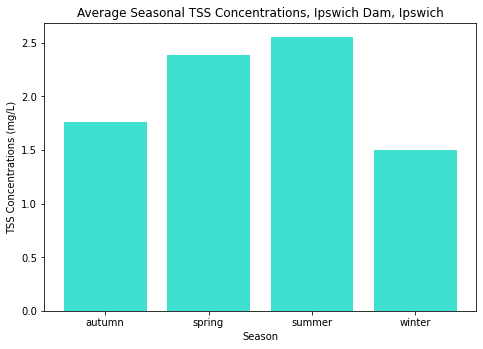

In [45]:
# seasonalTSS distribution
#bar graph THIS GRAPH NEEDS WORK!

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar( dftss_szn.index, dftss_szn['tss_mgL'], color='turquoise', label='TSS Concentration (mg/L)')
ax.set_ylabel('TSS Concentrations (mg/L)')
ax.set_xlabel('Season')
#ax.legend(bbox_to_anchor=(1.1,1), loc='upper left')
ax.set_title('Average Seasonal TSS Concentrations, Ipswich Dam, Ipswich')
plt.show()



Text(0.5, 1.0, 'Average Monthly TSS Concentrations, Ipswich Dam, Ipswich')

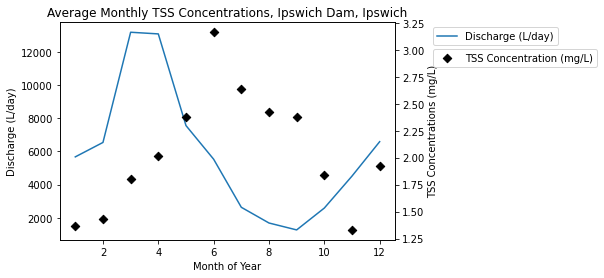

In [46]:
#monthly TSS distribution -scatter plots
fig, (ax)=plt.subplots(1,1, sharex=True)
ax.plot(dfq_month['discharge'], label='Discharge (L/day)')
ax2 = ax.twinx()
ax2.scatter(y=dftss_month['tss_mgL'], x=dftss_month.index, color='black', marker='D', label='TSS Concentration (mg/L)')
ax.set_xlabel('Month of Year')
ax.set_ylabel('Discharge (L/day)')
ax2.set_ylabel('TSS Concentrations (mg/L)')
ax.legend(bbox_to_anchor=(1.1,1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.1,.90), loc='upper left')
ax.set_title('Average Monthly TSS Concentrations, Ipswich Dam, Ipswich')

###Results:
The TSS centroid day is July 26th, and the normalized seasonal time of occurance is August 31st. The discharge centroid day is June 1st, and the normalized seasonal time of occurrance is September 11th. The precipitation centroid day is July 11th, and the normalized seasonal time of occurrance is April 5th. (These results do not indicate strong seasonal relationships between !!!!!!)


Text(0.5, 1.0, 'Seasonal TSS Concentrations, Precipitation, and Discharge Averages, Ipswich Dam, Ipswich MA: 2006-2020')

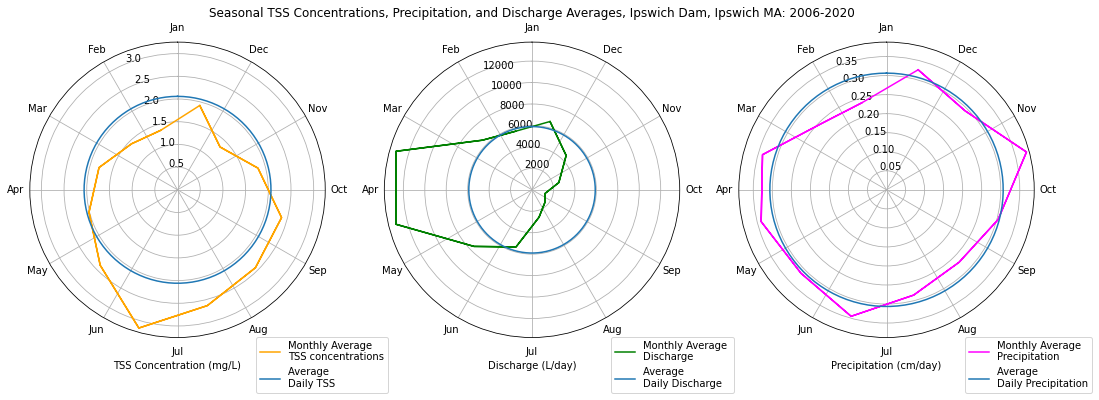

In [47]:
# polar plot
#TSS
#theta value- defines quadrat spacing
theta1 = dftss_month2['MDay Radians']
theta2 = dfq_month2['MDay Radians']
theta3 = dfp_month2['MDay Radians']
radii=np.random.rand(365)

#polar plot projection command
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='polar'))
fig.set_size_inches(18, 14)

ax1.set_theta_zero_location('N') #sets 1st theta value (or Jan) to North or upper quadrat
ax2.set_theta_zero_location('N') 
ax3.set_theta_zero_location('N') 

#plot monthly average tss, precip, discharge 
ax1.plot(dftss_month2['MDay Radians'], dftss_month2['tss_mgL'], label= 'Monthly Average \nTSS concentrations', color='orange')
ax1.plot(np.linspace(0, 2* np.pi, 100), np.full(100, annualmeantss)/ 365.25,
        label= 'Average \nDaily TSS')
ax2.plot(dfq_month2['MDay Radians'], dfq_month2['discharge'], label= 'Monthly Average \nDischarge', color='green')
ax2.plot(np.linspace(0, 2* np.pi, 100), np.full(100, annualmeanQ)/ 365.25,
        label= 'Average \nDaily Discharge')
ax3.plot(dfp_month2['MDay Radians'], dfp_month2['precip'], label= 'Monthly Average \nPrecipitation', color='fuchsia')
ax3.plot(np.linspace(0, 2* np.pi, 100), np.full(100, annualmeanP)/ 365.25,
        label= 'Average \nDaily Precipitation')


#adjusts theta labels for months
ax1.set_xticks(np.pi/180*np.linspace(0,360,12, endpoint=False))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_xticks(np.pi/180*np.linspace(0,360,12, endpoint=False))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3.set_xticks(np.pi/180*np.linspace(0,360,12, endpoint=False))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#legends
ax1.set_xlabel('TSS Concentration (mg/L)')
ax2.set_xlabel('Discharge (L/day)')
ax3.set_xlabel('Precipitation (cm/day)')
ax1.legend(bbox_to_anchor=(.75,.02), loc='upper left')
ax2.legend(bbox_to_anchor=(.75,.02), loc='upper left')
ax3.legend(bbox_to_anchor=(.75,0.02), loc='upper left')
ax2.set_title('Seasonal TSS Concentrations, Precipitation, and Discharge Averages, Ipswich Dam, Ipswich MA: 2006-2020')

